In [1]:
#this project for bank users 
#the proble ("""""""""")

In [1]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Loan_Default.csv')

In [3]:
#understanding the data set 

In [4]:
df.head()

ID  year loan_limit             Gender approv_in_adv loan_type  \
0  24890  2019         cf  Sex Not Available         nopre     type1   
1  24891  2019         cf               Male         nopre     type2   
2  24892  2019         cf               Male           pre     type1   
3  24893  2019         cf               Male         nopre     type1   
4  24894  2019         cf              Joint           pre     type1   

  loan_purpose Credit_Worthiness open_credit business_or_commercial  ...  \
0           p1                l1        nopc                  nob/c  ...   
1           p1                l1        nopc                    b/c  ...   
2           p1                l1        nopc                  nob/c  ...   
3           p4                l1        nopc                  nob/c  ...   
4           p1                l1        nopc                  nob/c  ...   

   credit_type  Credit_Score  co-applicant_credit_type    age  \
0          EXP           758                       CIB  25-34   
1         EQUI           552                       EXP  55-64   
2          EXP           834                       CIB  35-44   
3          EXP           587                       CIB  45-54   
4         CRIF           602                       EXP  25-34   

   submission_of_application        LTV Region Security_Type  Status dtir1  
0                    to_inst  98.728814  south        direct       1  45.0  
1                    to_inst        NaN  North        direct       1   NaN  
2                    to_inst  80.019685  south        direct       0  46.0  
3                   not_inst  69.376900  North        direct       0  42.0  
4                   not_inst  91.886544  North        direct       0  39.0  

[5 rows x 34 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [6]:
df.shape

(148670, 34)

In [7]:
df.size

5054780

In [22]:
df.drop(columns=['co-applicant_credit_type','rate_of_interest','dtir1','Security_Type','submission_of_application','Credit_Score','total_units','occupancy_type','construction_type','property_value','lump_sum_payment','Neg_ammortization','term','ID','year','loan_purpose','open_credit','approv_in_adv','Interest_rate_spread','Upfront_charges'],inplace=True)
df.info()
                 
       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Gender                  148670 non-null  object 
 1   loan_type               148670 non-null  object 
 2   Credit_Worthiness       148670 non-null  object 
 3   business_or_commercial  148670 non-null  object 
 4   loan_amount             148670 non-null  int64  
 5   interest_only           148670 non-null  object 
 6   Secured_by              148670 non-null  object 
 7   income                  139520 non-null  float64
 8   credit_type             148670 non-null  object 
 9   age                     148470 non-null  object 
 10  LTV                     133572 non-null  float64
 11  Region                  148670 non-null  object 
 12  Status                  148670 non-null  int64  
dtypes: float64(2), int64(2), object(9)
memory usage: 14.7+ MB


In [28]:
df.describe()

loan_amount         income           LTV        Status
count  6.961200e+04   66157.000000  62305.000000  69612.000000
mean   3.174928e+05    6281.583808     73.157357      0.257700
std    1.765205e+05    6145.809566     20.902455      0.437371
min    1.650000e+04       0.000000      3.083554      0.000000
25%    1.865000e+05    3420.000000     61.284722      0.000000
50%    2.865000e+05    5160.000000     75.557621      0.000000
75%    4.165000e+05    7620.000000     87.060302      1.000000
max    3.576500e+06  335880.000000   2331.250000      1.000000

In [30]:
df['Gender'].value_counts()


Male      42346
Female    27266
Name: Gender, dtype: int64

In [32]:
df['income'].value_counts()

3600.0     681
3120.0     668
4200.0     656
4500.0     642
3300.0     641
          ... 
53160.0      1
50280.0      1
46560.0      1
48000.0      1
79920.0      1
Name: income, Length: 784, dtype: int64

In [33]:
df['credit_type'].value_counts()

CIB     22668
CRIF    20460
EXP     19177
EQUI     7307
Name: credit_type, dtype: int64

In [19]:
#we notice that Marital_Status and Income_Category have a unknown values 
#since the Marital_Status is unknown dosnt count as a null value we will keep it 

In [20]:
#### delete unkonwn from income category and education level

In [27]:
# dropping unknown values (null)
df.drop(df.loc[df['Gender']=="Joint"].index, inplace=True) 
df.drop(df.loc[df['Gender']=="Sex Not Available"].index, inplace=True)

# display
df


Gender loan_type Credit_Worthiness business_or_commercial  \
1         Male     type2                l1                    b/c   
2         Male     type1                l1                  nob/c   
3         Male     type1                l1                  nob/c   
7       Female     type1                l1                  nob/c   
10        Male     type2                l2                    b/c   
...        ...       ...               ...                    ...   
148663    Male     type2                l1                    b/c   
148666    Male     type1                l1                  nob/c   
148667    Male     type1                l1                  nob/c   
148668  Female     type1                l1                  nob/c   
148669  Female     type1                l1                  nob/c   

        loan_amount interest_only Secured_by   income credit_type    age  \
1            206500       not_int       home   4980.0        EQUI  55-64   
2            406500       not_int       home   9480.0         EXP  35-44   
3            456500       not_int       home  11880.0         EXP  45-54   
7            266500       not_int       home   3780.0         CIB  55-64   
10           136500       not_int       home   4020.0         EXP  55-64   
...             ...           ...        ...      ...         ...    ...   
148663       106500       not_int       home   1860.0        EQUI    <25   
148666       586500       not_int       home   7140.0         CIB  25-34   
148667       446500       not_int       home   6900.0         CIB  45-54   
148668       196500       not_int       home   7140.0         EXP  55-64   
148669       406500       not_int       home   7260.0         CIB  45-54   

              LTV Region  Status  
1             NaN  North       1  
2       80.019685  south       0  
3       69.376900  North       0  
7       86.525974  North       0  
10      81.250000  North       1  
...           ...    ...     ...  
148663        NaN  North       1  
148666  74.428934  south       0  
148667  61.332418  North       0  
148668  70.683453  North       0  
148669  72.849462  North       0  

[69612 rows x 13 columns]

In [17]:
#check if unknow data deleted 
df['term'].value_counts()

360.0    121685
180.0     12981
240.0      5859
300.0      2822
324.0      2766
120.0       510
144.0       263
348.0       260
336.0       213
96.0        194
312.0       185
156.0       174
216.0       115
276.0       100
132.0        93
288.0        90
168.0        82
228.0        74
204.0        59
264.0        43
108.0        33
192.0        17
252.0         8
165.0         1
280.0         1
322.0         1
Name: term, dtype: int64

In [38]:
#
df.dropna(inplace=True)

df

Gender loan_type Credit_Worthiness business_or_commercial  \
2         Male     type1                l1                  nob/c   
3         Male     type1                l1                  nob/c   
7       Female     type1                l1                  nob/c   
10        Male     type2                l2                    b/c   
14      Female     type1                l1                  nob/c   
...        ...       ...               ...                    ...   
148660  Female     type1                l1                  nob/c   
148666    Male     type1                l1                  nob/c   
148667    Male     type1                l1                  nob/c   
148668  Female     type1                l1                  nob/c   
148669  Female     type1                l1                  nob/c   

        loan_amount interest_only Secured_by   income credit_type    age  \
2            406500       not_int       home   9480.0         EXP  35-44   
3            456500       not_int       home  11880.0         EXP  45-54   
7            266500       not_int       home   3780.0         CIB  55-64   
10           136500       not_int       home   4020.0         EXP  55-64   
14           226500       not_int       home   7860.0         CIB  35-44   
...             ...           ...        ...      ...         ...    ...   
148660       366500       not_int       home   7200.0         CIB  45-54   
148666       586500       not_int       home   7140.0         CIB  25-34   
148667       446500       not_int       home   6900.0         CIB  45-54   
148668       196500       not_int       home   7140.0         EXP  55-64   
148669       406500       not_int       home   7260.0         CIB  45-54   

              LTV Region  Status  
2       80.019685  south       0  
3       69.376900  North       0  
7       86.525974  North       0  
10      81.250000  North       1  
14      76.006711  North       0  
...           ...    ...     ...  
148660  55.699088  North       0  
148666  74.428934  south       0  
148667  61.332418  North       0  
148668  70.683453  North       0  
148669  72.849462  North       0  

[58856 rows x 13 columns]

In [39]:
df.isnull().sum()

Gender                    0
loan_type                 0
Credit_Worthiness         0
business_or_commercial    0
loan_amount               0
interest_only             0
Secured_by                0
income                    0
credit_type               0
age                       0
LTV                       0
Region                    0
Status                    0
dtype: int64

In [25]:
df=df.replace('type1','House')
df=df.replace('type2','Education')

df


Attrition_Flag  Customer_Age  Gender  Dependent_count  \
0      Existing Customer            45    Male                3   
1      Existing Customer            49  Female                5   
2      Existing Customer            51    Male                3   
3      Existing Customer            40  Female                4   
4      Existing Customer            40    Male                3   
...                  ...           ...     ...              ...   
10121  Existing Customer            56  Female                1   
10122  Existing Customer            50    Male                2   
10124  Attrited Customer            44  Female                1   
10125  Attrited Customer            30    Male                2   
10126  Attrited Customer            43  Female                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10121        Graduate         Single  Less than $40K          Blue   
10122        Graduate         Single     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Total_Relationship_Count  Credit_Limit  Total_Revolving_Bal  \
0                             5       12691.0                  777   
1                             6        8256.0                  864   
2                             4        3418.0                    0   
3                             3        3313.0                 2517   
4                             5        4716.0                    0   
...                         ...           ...                  ...   
10121                         4        3688.0                  606   
10122                         3        4003.0                 1851   
10124                         5        5409.0                    0   
10125                         4        5281.0                    0   
10126                         6       10388.0                 1961   

       Total_Trans_Amt  Total_Trans_Ct  
0                 1144              42  
1                 1291              33  
2                 1887              20  
3                 1171              20  
4                  816              28  
...                ...             ...  
10121            14596             120  
10122            15476             117  
10124            10291              60  
10125             8395              62  
10126            10294              61  

[7641 rows x 13 columns]

In [26]:
df['Avg_Trans_Amt'] = (df['Total_Trans_Amt'] / df['Total_Trans_Ct'])

In [27]:
df

Attrition_Flag  Customer_Age  Gender  Dependent_count  \
0      Existing Customer            45    Male                3   
1      Existing Customer            49  Female                5   
2      Existing Customer            51    Male                3   
3      Existing Customer            40  Female                4   
4      Existing Customer            40    Male                3   
...                  ...           ...     ...              ...   
10121  Existing Customer            56  Female                1   
10122  Existing Customer            50    Male                2   
10124  Attrited Customer            44  Female                1   
10125  Attrited Customer            30    Male                2   
10126  Attrited Customer            43  Female                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10121        Graduate         Single  Less than $40K          Blue   
10122        Graduate         Single     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Total_Relationship_Count  Credit_Limit  Total_Revolving_Bal  \
0                             5       12691.0                  777   
1                             6        8256.0                  864   
2                             4        3418.0                    0   
3                             3        3313.0                 2517   
4                             5        4716.0                    0   
...                         ...           ...                  ...   
10121                         4        3688.0                  606   
10122                         3        4003.0                 1851   
10124                         5        5409.0                    0   
10125                         4        5281.0                    0   
10126                         6       10388.0                 1961   

       Total_Trans_Amt  Total_Trans_Ct  Avg_Trans_Amt  
0                 1144              42      27.238095  
1                 1291              33      39.121212  
2                 1887              20      94.350000  
3                 1171              20      58.550000  
4                  816              28      29.142857  
...                ...             ...            ...  
10121            14596             120     121.633333  
10122            15476             117     132.273504  
10124            10291              60     171.516667  
10125             8395              62     135.403226  
10126            10294              61     168.754098  

[7641 rows x 14 columns]

<Figure size 640x480 with 0 Axes>

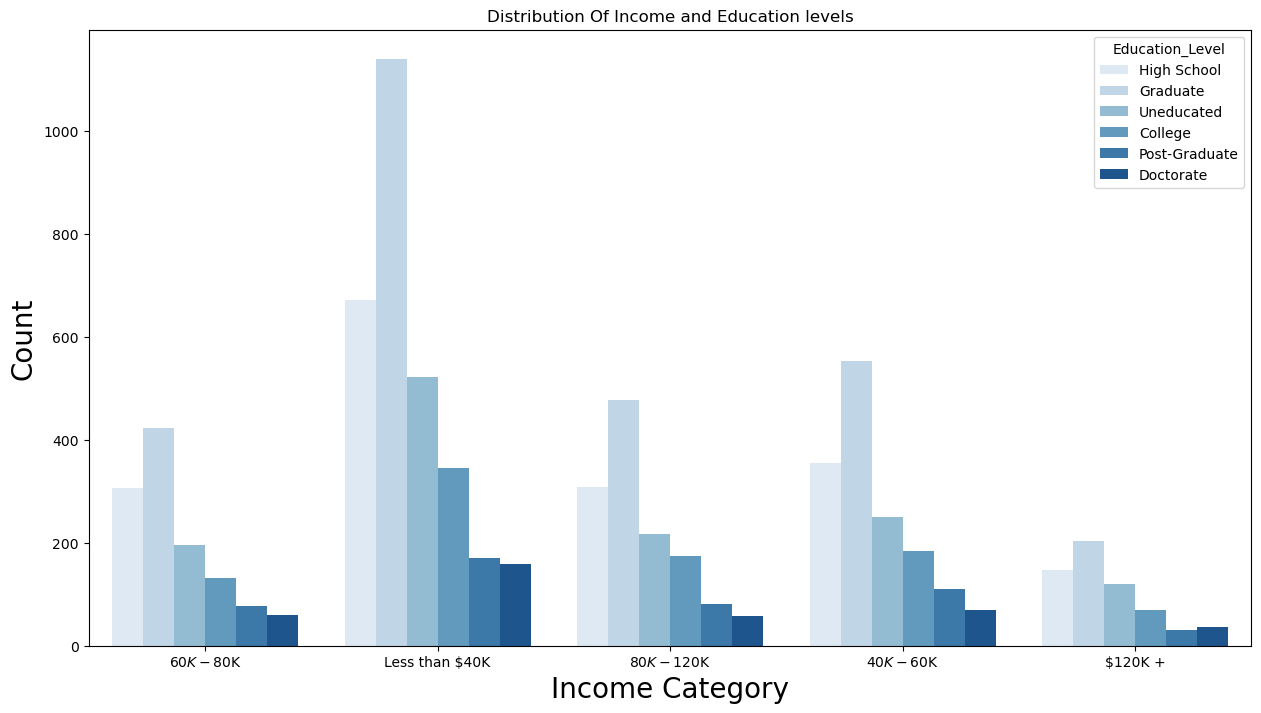

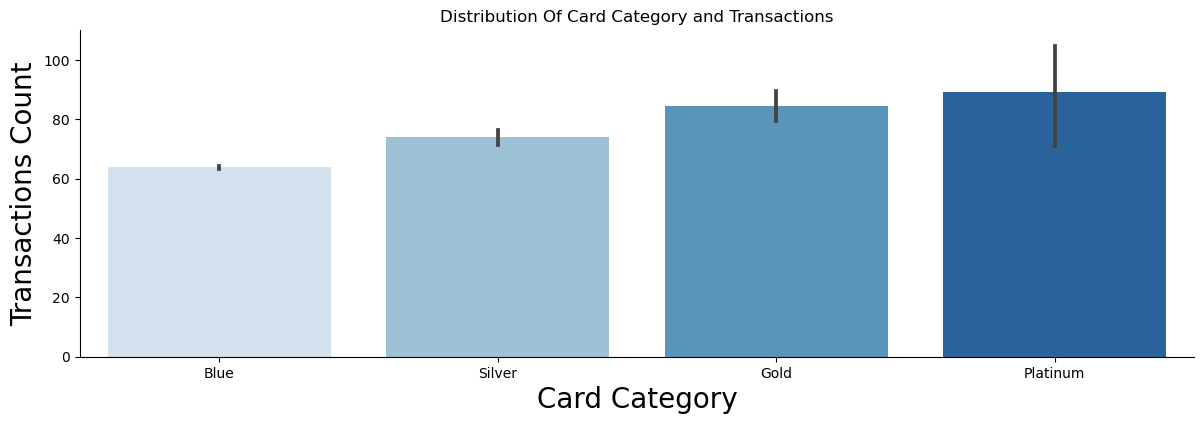

In [28]:
#f, axes = plt.subplots(2, 1)

plt.suptitle('Bank Customer Data',fontsize = 16)
plt.figure(figsize=[15,8])

#first

c1=sns.countplot(data=df, x="Income_Category", hue="Education_Level",palette="Blues")
c1.set_xlabel('Income Category',fontsize=20)
c1.set_ylabel('Count',fontsize=20)
plt.title("Distribution Of Income and Education levels");

#second

c2=sns.catplot(
data=df,x="Card_Category", y="Total_Trans_Ct",height=4, aspect=3,palette="Blues",kind="bar")
c2.set_axis_labels("Card Category", "Transactions Count",fontsize=20)
plt.title("Distribution Of Card Category and Transactions"); 




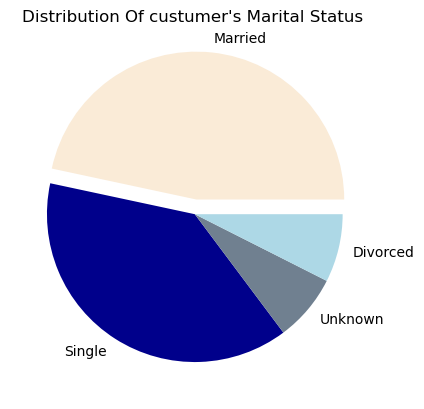

In [29]:
#third
newarray=[]
newarray.append(df['Marital_Status'].value_counts()['Married'])
newarray.append(df['Marital_Status'].value_counts()['Single'])
newarray.append(df['Marital_Status'].value_counts()['Unknown'])
newarray.append(df['Marital_Status'].value_counts()['Divorced'])
mylabels = ["Married", "Single", "Unknown", "Divorced"]
colors = ['antiquewhite', 'darkblue', 'slategrey', 'lightblue']



c3=plt.pie(newarray, labels = mylabels,colors=colors,explode = (0.1, 0, 0., 0.) )

plt.title("Distribution Of custumer's Marital Status ");



/var/folders/hf/vxdj7wlj7sngj7ksr0vws3vc0000gn/T/ipykernel_88684/3329227752.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x="Attrition_Flag",palette="Blues",shrink=.6)


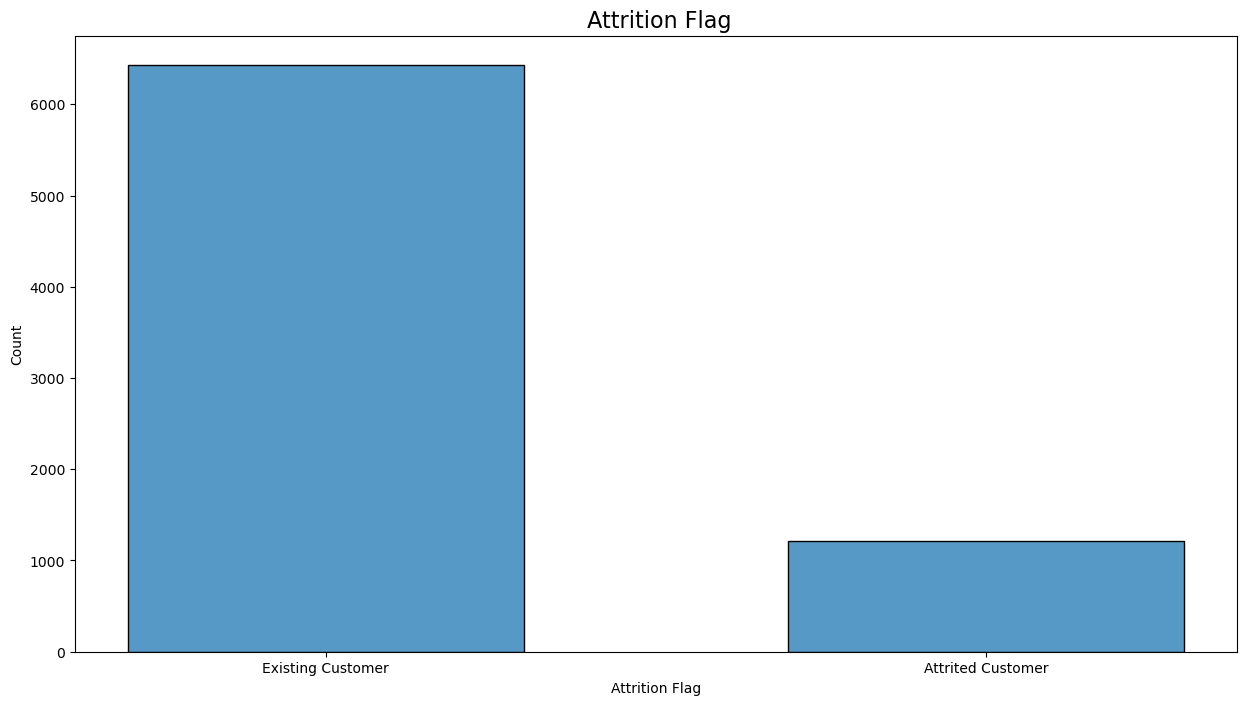

In [30]:
# fourth
plt.figure(figsize=(15,8))
sns.histplot(data=df, x="Attrition_Flag",palette="Blues",shrink=.6)
plt.title(" Attrition Flag" ,fontsize=16);
plt.xlabel('Attrition Flag');
plt.ylabel('Count');
#insight : this chart for the existing customer and attrited customer the existing customer is about 7500 
#where the arrive is 1500

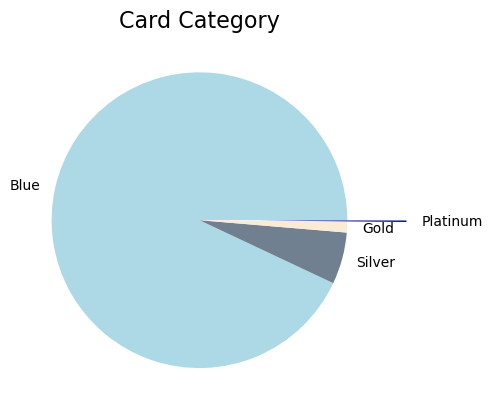

In [31]:
# fifth
colors = ['lightblue', 'slategrey','antiquewhite', 'darkblue']
plt.pie(df['Card_Category'].value_counts(),labels=['Blue','Silver','Gold', 'Platinum'],colors = colors,explode = [.0,.0,.0,.4]);
plt.title("Card Category",fontsize=16);
# insight : common type is 'BLUE' whish is more than 8500 and the least is platinum

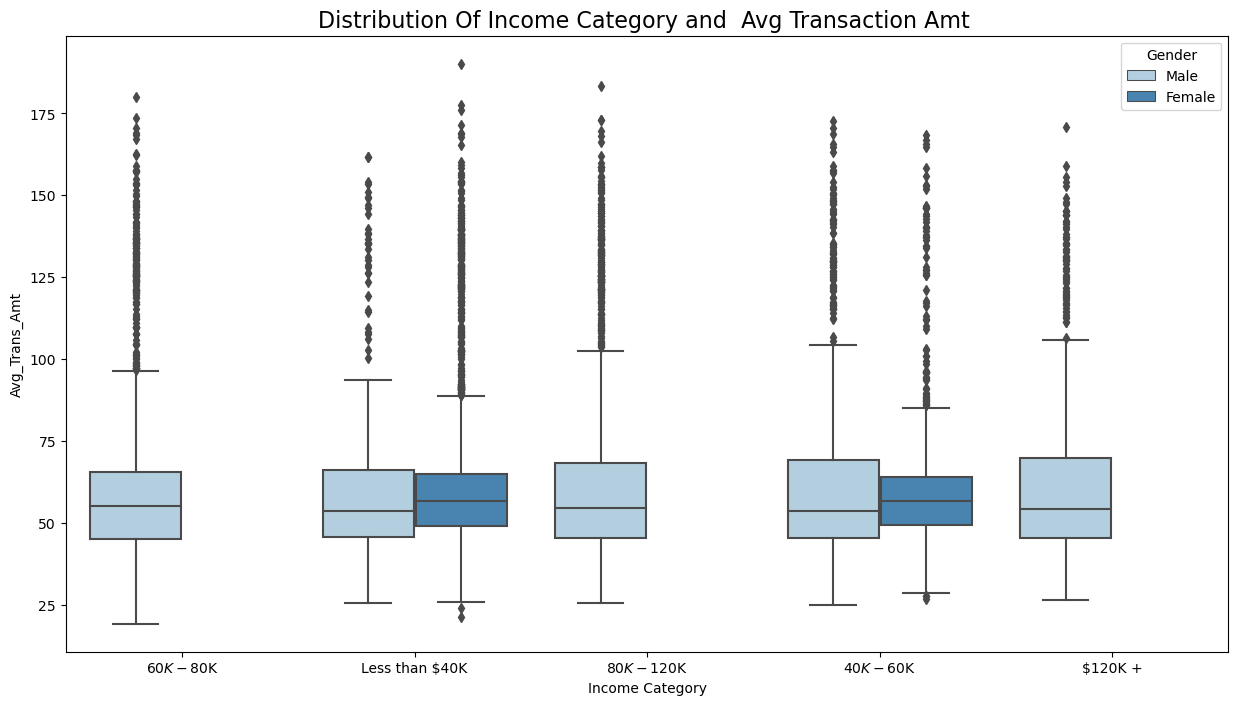

In [32]:
# sixth
plt.figure(figsize=(15,8))
sns.boxplot(x="Income_Category", y="Avg_Trans_Amt", hue='Gender', data=df,palette="Blues");
plt.xlabel('Income Category')
plt.ylabel('Avg_Trans_Amt')
plt.title("Distribution Of Income Category and  Avg Transaction Amt ",fontsize=16);

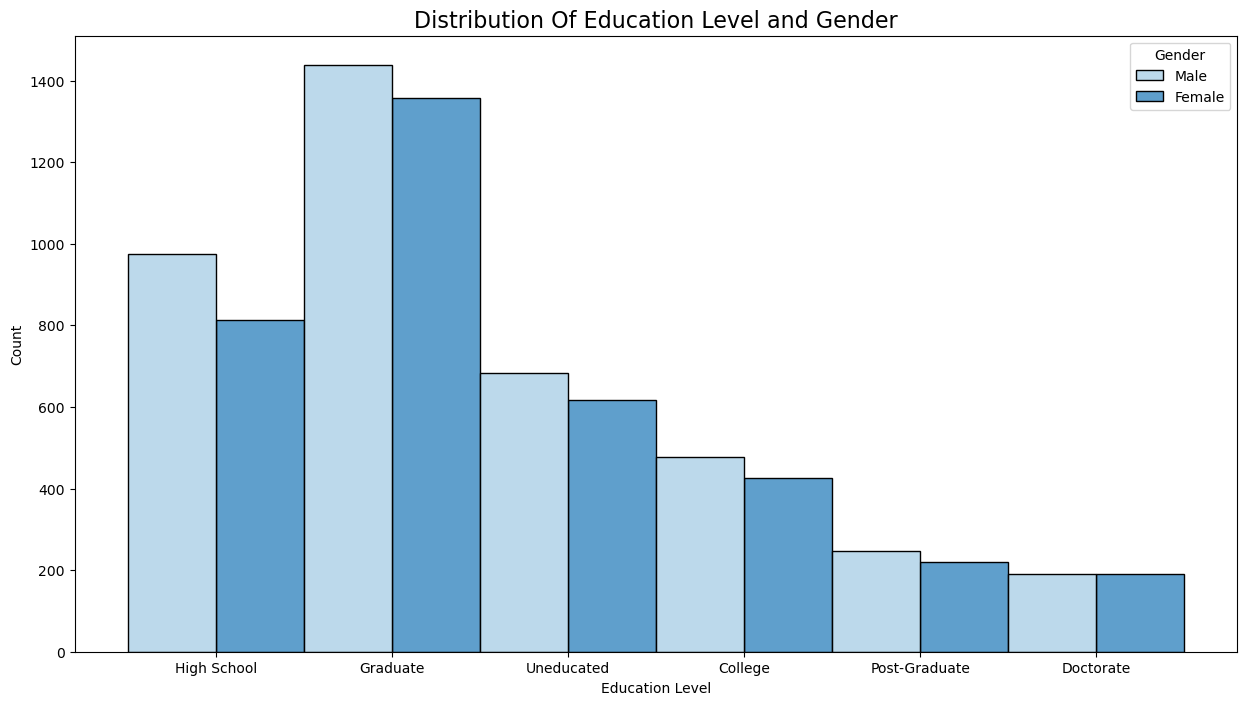

In [33]:
# seventh
plt.figure(figsize=(15,8))
sns.histplot(
    df,
    x="Education_Level",
    hue="Gender", # color of plot elements
    multiple="dodge", # also can be layer or dodge or fill
    alpha=0.8,
    palette="Blues"
)
plt.xlabel('Education Level')

plt.title("Distribution Of Education Level and Gender",fontsize=16);
# in all Education level we have more male than female and the highst category is the graducated and the least in the doctorate degree

In [34]:
df.value_counts(["Gender", "Education_Level"])

Gender  Education_Level
Male    Graduate           1438
Female  Graduate           1358
Male    High School         976
Female  High School         812
Male    Uneducated          684
Female  Uneducated          618
Male    College             478
Female  College             427
Male    Post-Graduate       248
Female  Post-Graduate       221
Male    Doctorate           191
Female  Doctorate           190
dtype: int64

<Figure size 640x480 with 0 Axes>

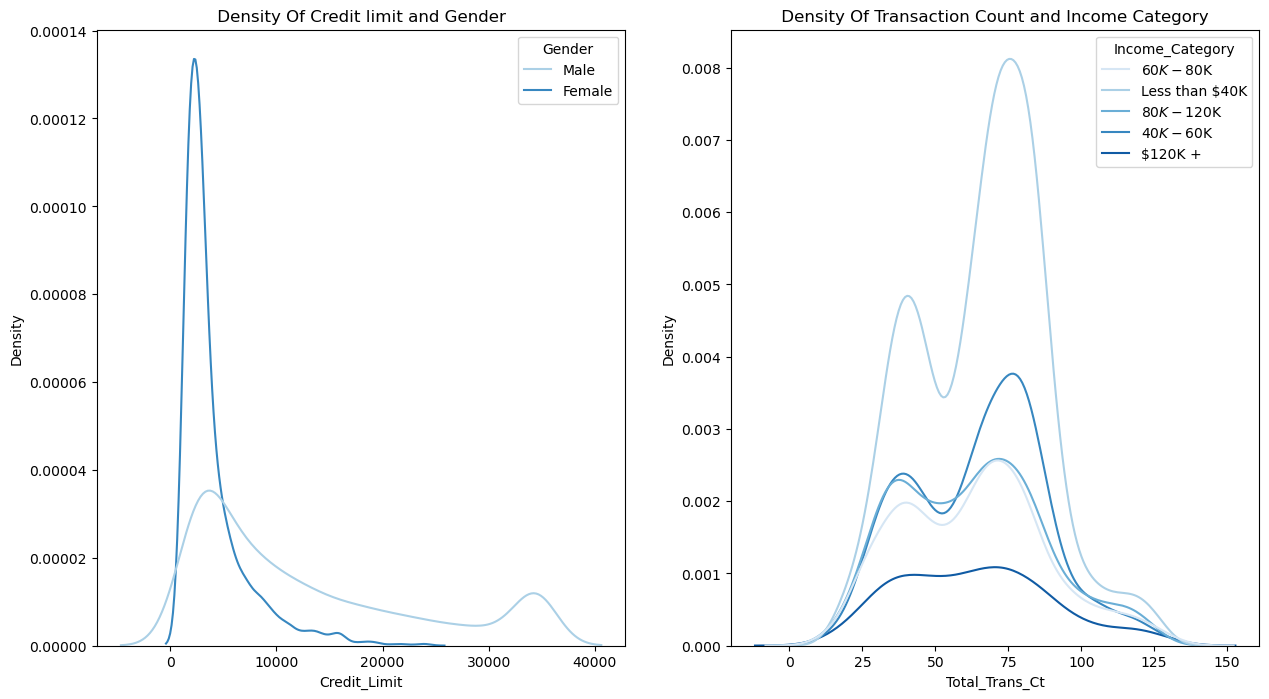

In [35]:
plt.suptitle('Bank Customer Data',fontsize = 16);
plt.figure(figsize=[15,8]);

#eighth
plt.subplot(1,2,1);
sns.kdeplot(data=df, x="Credit_Limit",hue="Gender", palette="Blues");
plt.title(" Density Of Credit limit and Gender ");

#ninth
plt.subplot(1,2,2);
sns.kdeplot(data=df, x="Total_Trans_Ct",hue="Income_Category", palette="Blues");
plt.title(" Density Of Transaction Count and Income Category ");



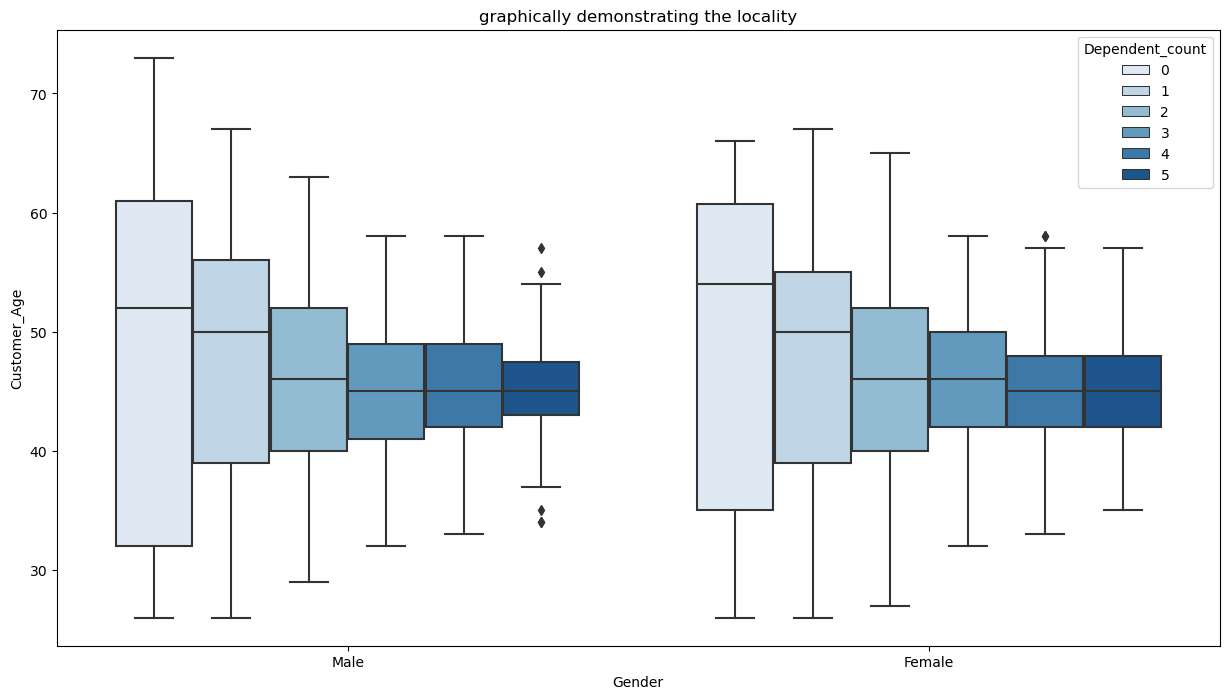

In [36]:
#ten
plt.figure(figsize=[15,8])
sns.boxplot(x='Gender', y='Customer_Age',hue='Dependent_count', data = df,palette="Blues");
plt.title("graphically demonstrating the locality");


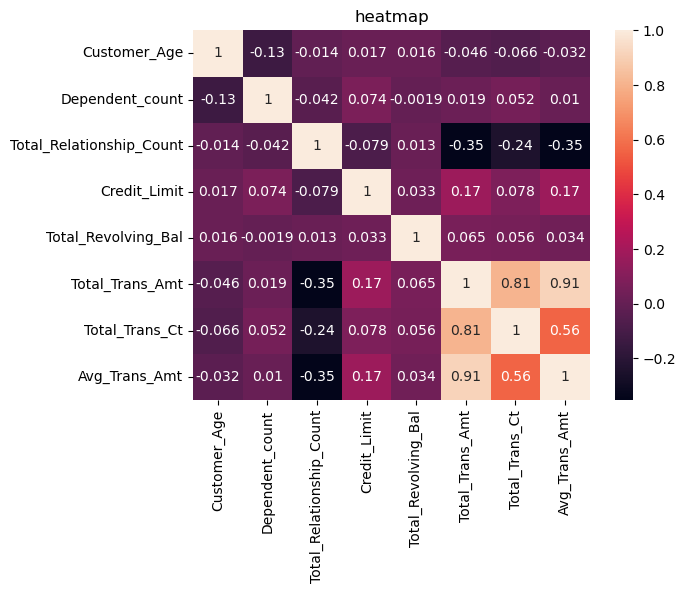

In [45]:
#elevn 
sns.heatmap(df.corr(),annot = True );
plt.title("heatmap");

In [39]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]